<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/7_RNN_Gating_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리를 위한 시퀀스 모델링 - 중급(시퀀스 예측)

시퀀스 예측(sequence prediction) 작업은 시퀀스의 각 항목에 레이블을 할당해야 한다. 

예를 들어 각 타임 스텝에서 주어진 단어 시퀀스를 기반으로 다음 단어를 예측하는 **자연어 모델링**, 단어의 문법 품사를 예측하는 **품사 태깅**(part-of-speech tagging), 단어가 사람, 위치, 제품, 회사 같은 개체명에 속하는지 예측하는 **개체명 인식**(named entity recognition) 등이다.

 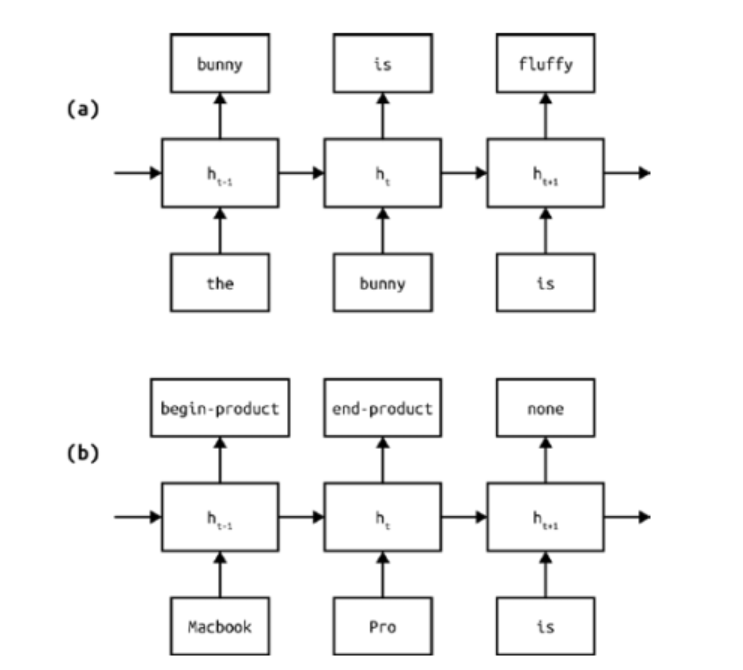

위 그림에서 (a)는 언어모델링, (b)는 개체명 인식
 
 NLP 논문에서는 시퀀스 예측을 **시퀀스 레이블링(sequence labeling)**이라고도 한다.

 6장에서 살펴본 엘만 순환 신경망을 시퀀스 예측에 사용할 수는 있지만 실제로 **멀리 떨어진 의존성**을 잘 감지하지 못해 잘 동작하지 않는다. 왜 그런 현상이 발생하는지 알아보고, 게이트 네트워크(gated network)라는 새로운 RNN 구조를 아라보자.


## 엘만 RNN의 문제점

엘만 RNN은 **멀리 떨어진 정보를 예측**에 사용하지 못하며 **불안정한 그레이디언트**를 가진다.

RNN은 현재 타임 스텝의 입력벡터와 이전 타임 스텝의 은닉 상태 벡터를 사용해 타임 스텝마다 은닉 상태 벡터를 계산한다. 이 계산은 RNN을 강력하게 만드는 동시에 극단적 수치 문제도 발생시킨다.

멀리 떨어진 정보를 유지하기 어려운 이유는 무엇일까? RNN은 타임 스텝마다 정보의 유익성에 상관없이 은닉 상태 벡터를 업데이트 한다. 즉, 은닉 상태에 어떤 값을 유지하고 어떤 값을 버릴지 제어하지 못한다.(이렇게 되면 타임스텝이 길어질수록 앞에 있던 단어에 대한 정보가 감소한다. 마치 문장이 길어지면 앞 단어가 잘 기억이 안나는 것과 비슷) 따라서 필요한 정보만은 은닉 상태에 담을 수 있도록 RNN이 선택적으로 업데이트를 결정하거나 업데이트할 때 상태 벡터의 어느 부분을 얼마만큽 업데이트할지 판단할 방법이 필요하다.

또한 엘만 RNN은 그레이디이언크를 0이나 무한대로 만드는 경향이 있다. 이렇게 불안적한 그레이디언트를 각각 **그레이디언트 소실**(vanishing gradient) 또는 **그레이디언트 폭주**(exploding gradient)라고 부른다. 이를 해결하기 위해 활성화 함수로 렐루 함수를 사용하거나 그레이디언트 클리핑, 적절히 가중치 초기화 하기 등의 방법이 있다. 하지만 이런 해결책 보다 **게이팅(gating)**이 더 안정적으로 동작한다.

## 엘만 RNN의 문제 해결책: 게이팅

a와 b를 더할 때 b가 더해지는 양을 제어하고 싶다고 가정해보자. 수학적으로 다음과 같이 표현할 수 있다.

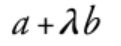

여기서 한자 여덟 팔 처럼 생긴 값(람다)은 0과 1사이의 값이다. 이 값이 0이라면 b의 기여가 없는 것일 것이고, 1이라면 b의 기여가 최대가 될 것이다. 즉, 이 값을 덧셈에 b가 포함되는 양을 조절하는 '스위치' 또는 '**게이트**'로 생각할 수 있다.

이 아이디어를 가지고 RNN에 게이팅을 어떻게 적용할까? 

우선 엘만 RNN의 업데이트식을 수학적으로 표현해보자.

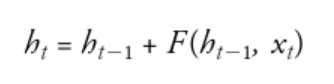

이전 타임 스텝의 은닉 상태가 ht-1 이고 현재 입력이 xt이다.

F는 RNN의 순환 계산을 의미한다. 

여기에 처음 제시한 식처럼 람다를 곱하여 곱해지는 양을 조절할 수 있을 것이다. 그런데 람다는 상수가 아니라 값이 변하는 함수(0과 1사이의 값)라도 게이팅 동작을 수행할 수 있다. 게이팅 함수를 사용한 RNN 업데이트 공식은 다음과 같다.

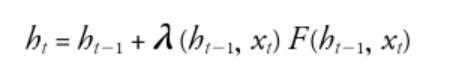

이제 ht-1을 업데이트하는 데 **현재 입력이 얼마나 들어가는지**를 함수 람다가 제어하게 된다. 함수 람다는 시그모이드 함수를 사용한다.

LSTM(long short-term memory network) 신경망은 이런 아이디어를 확장하여 조건에 따라 업데이트하는 것뿐만 아니라 이전 은닉 상태 ht-1의 값을 의도적으로 지운다. 이런 삭제 기능은 이전 은닉 상태값 ht-1과 또 다른 함수 u를 곱해서 수행된다.

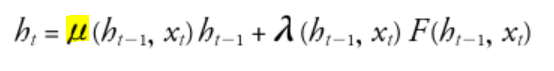

LSTM 외에도 다양한 게이팅 RNN이 있다. GRU(gated recurrent unit)도 인기가 많은 RNN이다. 